# <버스 내 체류시간 분석>

### 기준일 및 시간대별 버스내 체류시간(분) 분석비교

# 파일 불러오기

In [2]:
import pandas as pd

In [3]:
# # 파일
# for i in range(1,81,1):
#     file_path = './포항버스정보/trfcard({})/trfcard.csv'.format(i)
#     globals()['df{}'.format(i)] = pd.read_csv(file_path, encoding='utf-8-sig')

In [5]:
# # 전체 파일 행개수
# a = 0
# for i in range(1, 81):
#     a += len(globals()['df{}'.format(i)])
# a

In [6]:
df_total=pd.DataFrame()
for i in range(1,81,1):
    file_path = './포항/trfcard({})/trfcard.csv'.format(i)
    df = pd.read_csv(file_path, encoding='utf-8-sig')
    df_total = pd.concat([df_total, df])
    
    #globals()['df{}'.format(i)] = pd.read_csv(file_path, encoding='utf-8-sig')

In [7]:
len(df_total)

842608

In [8]:
df_total.head(1)

,on_date,off_date,route_name,descr,age_type,trans_yn,addfee_yn,start_bstop,start_gps_x,start_gps_y,end_bstop,end_gps_x,end_gps_y
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,동부초등학교,129.380866,36.062209


In [10]:
col_name = pd.read_excel('./포항/trfcard(1)/trfcard_columns.xlsx', header = 2)
col_name


kor_col = []
for j in range (len(col_name)):
    kor_col.append(col_name['컬럼명 (한글)'][j])
print(kor_col)


df_total.columns = kor_col
df_total

['승차시각', '하차시각', '노선명', '노선설명', '승객연령', '환승여부', '추가운임여부', '승차정류장', '승차정류장 GPS X', '승차정류장 GPS Y', '하차정류장', '하차정류장 GPS X', '하차정류장 GPS Y']


,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,동부초등학교,129.380866,36.062209
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,새마을금고해도지점,129.370626,36.015468
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,오거리,129.366312,36.031816
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,용덕사거리,129.415174,35.972826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,20200328232420,20200328232628,200,양덕-남구청(야구장)-구룡포,일반,N,N,형산로터리,129.368470,36.011630,뱃머리 평생학습원,129.354538,36.009020
3871,20200328232523,20200328233525,130,양덕-장량지구-양학-시청-송도-장량지구-양덕,일반,N,N,북구보건소,129.379384,36.070790,삼성쉐르빌,129.405302,36.086089
3872,20200328232554,20200328233435,160,문덕-대송-송도-죽도-용흥,일반,N,N,북구청,129.367128,36.041941,송림초등학교,129.375650,36.029730
3873,20200328232722,20200328235259,107,문덕-시외(고속)터미널-흥해,일반,N,N,KTX포항역(시내행),129.342368,36.072374,SK뷰2차,129.340636,36.008334


In [163]:
df_total.to_csv('./temp/df_total.csv')

# 데이터 확인

In [11]:
# 결측치 확인
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842608 entries, 0 to 3874
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   승차시각         842608 non-null  int64  
 1   하차시각         842608 non-null  int64  
 2   노선명          842608 non-null  object 
 3   노선설명         842608 non-null  object 
 4   승객연령         842608 non-null  object 
 5   환승여부         842608 non-null  object 
 6   추가운임여부       842608 non-null  object 
 7   승차정류장        842608 non-null  object 
 8   승차정류장 GPS X  842608 non-null  float64
 9   승차정류장 GPS Y  842608 non-null  float64
 10  하차정류장        842608 non-null  object 
 11  하차정류장 GPS X  842608 non-null  float64
 12  하차정류장 GPS Y  842608 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 90.0+ MB


In [12]:
df_total.describe()

,승차시각,하차시각,승차정류장 GPS X,승차정류장 GPS Y,하차정류장 GPS X,하차정류장 GPS Y
count,8.426080e+05,8.426080e+05,842608.000000,842608.000000,842608.000000,842608.000000
mean,2.020017e+13,2.020017e+13,129.369875,36.033987,129.369699,36.030874
std,6.691819e+07,6.691830e+07,0.051007,0.044272,0.042348,0.034512
min,2.020010e+13,2.020010e+13,129.025585,35.804119,129.025585,35.804119
25%,2.020012e+13,2.020012e+13,129.350290,36.010240,129.353856,36.013250
50%,2.020013e+13,2.020013e+13,129.365486,36.031170,129.365281,36.033732
75%,2.020022e+13,2.020022e+13,129.384770,36.064088,129.371682,36.045735
max,2.020033e+13,2.020040e+13,129.579045,36.303479,129.579045,36.303479


# datetime

In [13]:
df_total = df_total.astype('str')

In [44]:
df_total['년(승차)'] = df_total['승차시각'].str[:4]
df_total['월(승차)'] = df_total['승차시각'].str[4:6]
df_total['일(승차)'] = df_total['승차시각'].str[6:8]
df_total['시(승차)'] = df_total['승차시각'].str[8:10]
df_total['분(승차)'] = df_total['승차시각'].str[10:12]
df_total['초(승차)'] = df_total['승차시각'].str[12:]

df_total['년(하차)'] = df_total['하차시각'].str[:4]
df_total['월(하차)'] = df_total['하차시각'].str[4:6]
df_total['일(하차)'] = df_total['하차시각'].str[6:8]
df_total['시(하차)'] = df_total['하차시각'].str[8:10]
df_total['분(하차)'] = df_total['하차시각'].str[10:12]
df_total['초(하차)'] = df_total['하차시각'].str[12:]

# 소요시간

In [ ]:
# 소요시간
df_total['승차시각'] = df_total['승차시각'].astype(str)
df_total['하차시각'] = df_total['하차시각'].astype(str)

df_total['소요시간'] = pd.to_datetime(df_total['하차시각']) - pd.to_datetime(df_total['승차시각'])
df_total.head(1)

In [3]:
import pandas as pd
df_total = pd.read_csv('./temp/df_total.csv')

# 데이터 집계

In [8]:
df_total = df_total.astype('str')

df_total['년(승차)'] = df_total['승차시각'].str[:4]
df_total['월(승차)'] = df_total['승차시각'].str[4:6]
df_total['일(승차)'] = df_total['승차시각'].str[6:8]
df_total['시(승차)'] = df_total['승차시각'].str[8:10]
df_total['분(승차)'] = df_total['승차시각'].str[10:12]
df_total['초(승차)'] = df_total['승차시각'].str[12:]

df_total['년(하차)'] = df_total['하차시각'].str[:4]
df_total['월(하차)'] = df_total['하차시각'].str[4:6]
df_total['일(하차)'] = df_total['하차시각'].str[6:8]
df_total['시(하차)'] = df_total['하차시각'].str[8:10]
df_total['분(하차)'] = df_total['하차시각'].str[10:12]
df_total['초(하차)'] = df_total['하차시각'].str[12:]

In [9]:
# 소요시간
df_total['승차시각'] = df_total['승차시각'].astype(str)
df_total['하차시각'] = df_total['하차시각'].astype(str)

df_total['소요시간'] = pd.to_datetime(df_total['하차시각']) - pd.to_datetime(df_total['승차시각'])
df_total.head(1)

,Unnamed: 0,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,...,일(승차),시(승차),분(승차),초(승차),년(하차),월(하차),일(하차),시(하차),분(하차),초(하차)
0,0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,...,02,05,10,49,2020,01,02,05,18,44
1,1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,...,02,05,13,38,2020,01,02,05,45,49
2,2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,...,02,05,15,49,2020,01,02,05,19,30
3,3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.40252,...,02,05,16,17,2020,01,02,05,50,46
4,4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,...,02,05,18,41,2020,01,02,05,23,10


In [42]:
# df_total['시(승차)'] = df_total['시(승차)'].astype(int)
# df_total['분(승차)'] = df_total['분(승차)'].astype(int)
#df_total['체류시간(분)'] = df_total['시(승차)'] * 60 + df_total['분(승차)']
df_total

df_total['체류시간(분)'] = df_total['소요시간'].astype('timedelta64[m]').astype('int')

In [45]:
df_total_pivot = df_total.pivot_table(values = '체류시간(분)',
                                      index = '일(승차)',
                                      columns = '시(승차)',
                                      aggfunc = 'sum')                                 

In [46]:
df_total_pivot.fillna(0)
df_total_pivot

시(승차),00,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
일(승차),,,,,,,,,,,,,,,,,,,,
01,NaN,4236.0,8944.0,13212.0,24456.0,22742.0,26280.0,29146.0,30893.0,32912.0,33136.0,34435.0,29168.0,28254.0,22614.0,15874.0,13152.0,10928.0,7719.0,1328.0
02,NaN,2952.0,9784.0,22050.0,34431.0,34496.0,34174.0,37113.0,37380.0,40224.0,39938.0,40712.0,37194.0,38951.0,29499.0,17189.0,14714.0,13001.0,8729.0,1370.0
03,NaN,4422.0,13938.0,32689.0,45494.0,44569.0,44753.0,47297.0,45199.0,49335.0,48921.0,50148.0,44965.0,47513.0,39395.0,19703.0,15017.0,13814.0,9799.0,1775.0
04,NaN,4237.0,13935.0,28513.0,38770.0,38012.0,39516.0,41265.0,43881.0,43942.0,42223.0,44341.0,42267.0,43198.0,31206.0,18291.0,14698.0,13036.0,8692.0,1544.0
05,NaN,3484.0,11197.0,22821.0,31706.0,32337.0,33531.0,35386.0,36558.0,38603.0,38018.0,39440.0,35875.0,37183.0,30179.0,16601.0,13817.0,12297.0,7705.0,1081.0
06,NaN,4185.0,14536.0,34225.0,45377.0,44206.0,39692.0,43532.0,42374.0,46678.0,48595.0,46869.0,42020.0,44093.0,32827.0,16941.0,14176.0,11253.0,8353.0,1349.0
07,NaN,3789.0,12886.0,27402.0,37785.0,38013.0,38049.0,40271.0,38154.0,39710.0,42073.0,39725.0,38100.0,40654.0,32050.0,17358.0,13751.0,13265.0,9051.0,1328.0
08,NaN,3415.0,9017.0,21889.0,30424.0,31508.0,33752.0,36663.0,37820.0,38536.0,39623.0,39040.0,37591.0,38617.0,30816.0,16864.0,14058.0,13242.0,8495.0,1337.0
09,NaN,3756.0,11170.0,24790.0,33576.0,36904.0,36520.0,37001.0,39560.0,39996.0,42528.0,43069.0,39669.0,40451.0,31721.0,16996.0,15270.0,13426.0,8013.0,1527.0


# 시각화

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

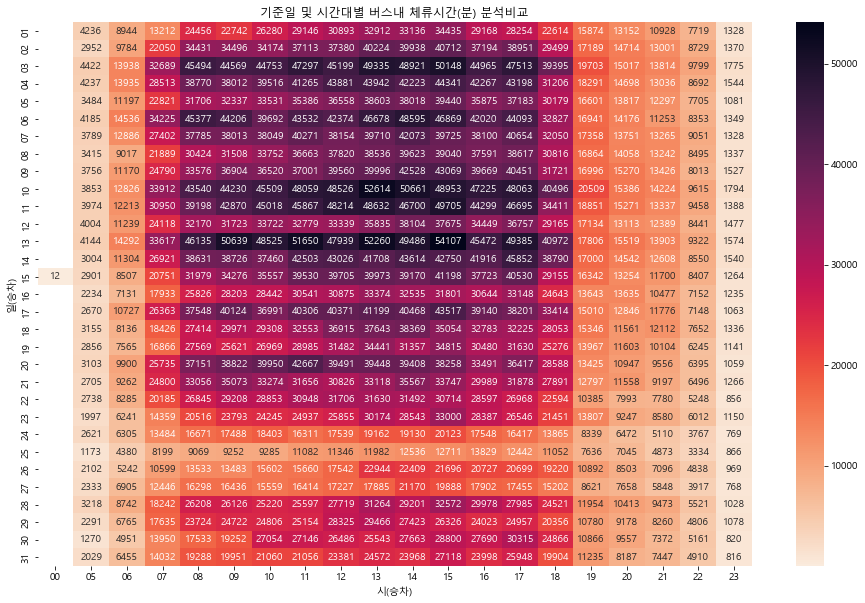

In [48]:
plt.figure(figsize=(16,10))
plt.rc("font", family = "Malgun Gothic", size=10)
sns.heatmap(df_total_pivot, annot=True, fmt='.0f', cmap='rocket_r')
plt.title("기준일 및 시간대별 버스내 체류시간(분) 분석비교")
plt.show()

### 시간 및 승객구분별 빈도분석 비교

In [11]:
df_total.head(1)

,Unnamed: 0,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y
0,0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,동부초등학교,129.380866,36.062209


In [34]:
df_total['승차시각'] = df_total['승차시각'].astype('str')
df_total['시(승차)'] = df_total['승차시각'].str[8:10]
df_total.head(1)
df_total_count = df_total[['승차시각','승객연령','시(승차)']]
customer_count = df_total_count.groupby('시(승차)')
customer_count['승객연령'].value_counts()

시(승차)  승객연령
00     일반         1
05     일반      5733
       청소년      173
       어린이        9
       None       3
               ... 
22     어린이      177
       None       4
23     일반      3647
       청소년      253
       어린이       18
Name: 승객연령, Length: 76, dtype: int64

In [35]:
df_total_fre=df_total.pivot_table(index = '승객연령',columns='시(승차)',values = '승차시각', aggfunc='count')
df_total_fre.fillna(0)
df_total_fre

시(승차),00,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
승객연령,,,,,,,,,,,,,,,,,,,,
None,NaN,3.0,35.0,42.0,56.0,68.0,81.0,96.0,96.0,79.0,87.0,86.0,63.0,52.0,33.0,23.0,16.0,5.0,4.0,NaN
어린이,NaN,9.0,36.0,230.0,479.0,477.0,595.0,740.0,965.0,991.0,959.0,939.0,954.0,850.0,651.0,436.0,322.0,219.0,177.0,18.0
일반,1.0,5733.0,18478.0,38718.0,52378.0,53790.0,54361.0,56759.0,57125.0,58734.0,59741.0,61721.0,56627.0,54667.0,48039.0,28376.0,24563.0,22813.0,16328.0,3647.0
청소년,NaN,173.0,840.0,2025.0,2389.0,2423.0,2883.0,3667.0,4742.0,5066.0,4603.0,4964.0,5378.0,5234.0,4261.0,2921.0,2564.0,2691.0,1960.0,253.0


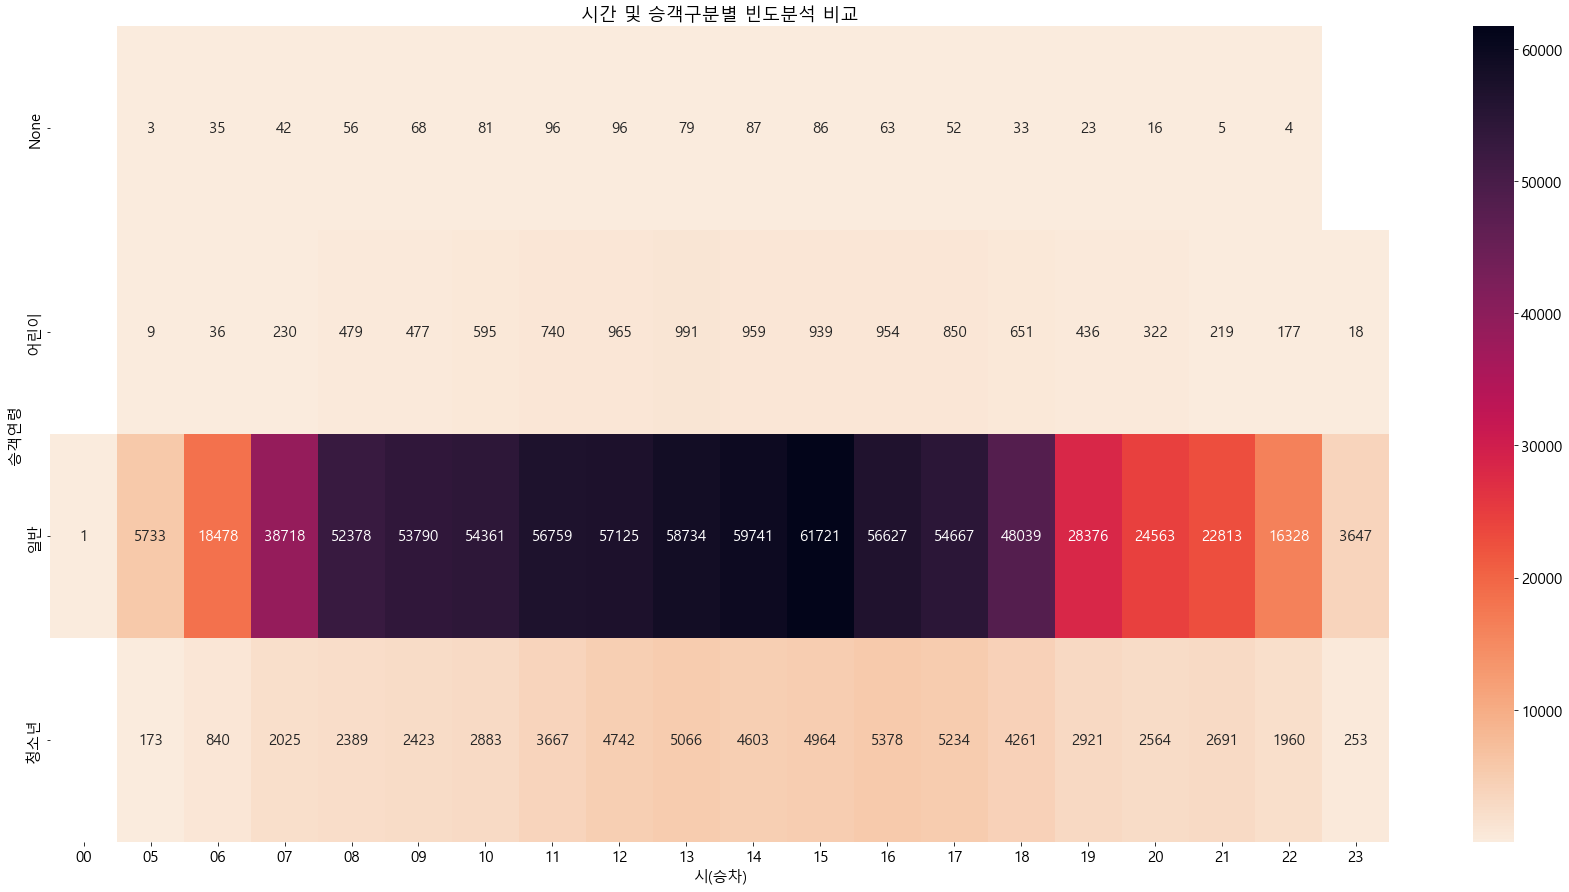

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family = 'Malgun Gothic', size = 15)
plt.figure(figsize=(30,15))
sns.heatmap(df_total_fre, annot = True, fmt='.0f', cmap='rocket_r')
plt.title('시간 및 승객구분별 빈도분석 비교')
plt.show()